# Energy Use and Greenhouse Gas Emissions for the Broader Public Sector Predictions

## 1. Initial inspection

#### 1.1 Import packages

In [212]:
import pandas as pd
import time
pd.set_option('display.max_columns', None)

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

### sklearn packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

#### 1.2 Read data from remote URL and check info

In [213]:
remote_url = "https://data.ontario.ca/dataset/5e976319-9769-4f77-aab9-d170e0131efe/resource/054263bd-9d22-4fd5-9057-333b0bf97df1/download/2019_final_data_set.xlsx"
df=pd.read_excel(remote_url)
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17208 entries, 0 to 17207
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sector                                   17208 non-null  object 
 1   SubSector                                17208 non-null  object 
 2   Organization                             17208 non-null  object 
 3   Operation                                17208 non-null  object 
 4   Operation Type                           17208 non-null  object 
 5   Address                                  17196 non-null  object 
 6   City                                     17208 non-null  object 
 7   Postal Code                              17192 non-null  object 
 8   Total Indoor Space_x                     17208 non-null  float64
 9   Unit of Measure                          16471 non-null  object 
 10  Weekly Average Hours                     17208

""


#### 1.3 Column Defination



* **Total Indoor Space_x** : Total floor area is the total number of square feet or square meters measured between the principal exterior surfaces of the enclosing fixed walls, including vent shafts and stairwells.

* **Weekly Average Hours** : is the number of hours per week that a building or facility (or a space within a building or facility being reported as a separate operation type) is occupied by at least 75% of the occupants, and is therefore considered occupied.

* **Annual Flow (M)** : The volume of water pumped or treated by a facility in a year in Mega Litres (ML). The Annual Flow is reported in order to calculate energy intensity for flow volumes.

* **FuelOil12_Quantity** : Type 1 fuel oil is intended primarily for use in sleeve-type and wick-feed burners, excluding space heaters
(see 9.1), and in most vaporizing pot-type burner applications. It is also intended for atomizing burners in which Type 2 fuel oil cannot be used satisfactorily. During periods of lower ambient temperature, Type 1 fuel oil may be used in place of Type 2 to minimize waxing problems.
c) Type 2 fuel oil is a heavier distillate than Type 1 and is intended for use in most atomizing-type burner applications. This type of fuel oil is used in most domestic oil burning appliances and in some medium capacity commercial and industrial burners. Type 2 may contain up to 5% biodiesel (See Annex C).

* **FuelOil46_Quantity** : a) Type 4 is an industrial fuel oil intended primarily for burner installations equipped with limited preheating facilities or with no preheating.
b) Type 5 is a residual fuel oil for burner installations equipped with limited preheating facilities that require a fuel
oil of lower viscosity than Type 6.
c) Type 6 is a high-viscosity residual fuel oil for use in burners equipped with preheating facilities to handle such
fuels.

* **DistrictHeating_IsRenewable** : Indicate “Yes” if the district heating purchased is generated from a renewable energy source. A renewable energy source means an energy source that is renewed by natural processes and includes wind, water, biomass, biogas, biofuel, solar energy, geothermal energy, or tidal forces.

* **DistrictHeating_RenewableEmissionFactor** : The Emission Factor is the ratio of GHG emissions produced to generate a unit of energy. In the case of district heating energy from a renewable source, there is still a certain level of greenhouse gas emissions released in the process of generating and delivering the energy to the end user. 

* **DistrictCooling_IsRenewable** : Indicate “Yes” if the district heating purchased is generated from a renewable energy source. A renewable energy source means an energy source that is renewed by natural processes and includes wind, water, biomass, biogas, biofuel, solar energy, geothermal energy, or tidal forces.

* **DistrictCooling_RenewableEmissionFactor** : The Emission Factor is the ratio of GHG emissions produced to generate a unit of energy. In the case of district heating energy from a renewable source, there is still a certain level of greenhouse gas emissions released in the process of generating and delivering the energy to the end user. 

* **Energy Intensity ekWh_sqft** : Energy Intensity (ekWh/sqft) reports the equivalent kilowatt hours per square foot
of each operation type reported. The Energy Intensity is calculated based on all of the energy purchased and consumed for each operation type reported relative to floor area.

* **Energy Intensity ekWh_mega_litre** : Energy Intensity (ekWh/ML ) reports the equivalent kilowatt hours per Megalitre
of each operation type reported. The Energy Intensity is calculated based on all of the energy purchased and consumed for each operation type reported relative to annual flow of water processed or pumped by a facility.




#### 1.4 Check columns and head of data

In [214]:
# Get Columns' Name
df.columns

Index(['Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
       'Address', 'City', 'Postal Code', 'Total Indoor Space_x',
       'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M',
       'Number of Portables', 'Swimming Pool', 'Electricity_Quantity',
       'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit',
       'FuelOil12_Quantity', 'FuelOil12_Unit', 'FuelOil46_Quantity',
       'FuelOil46_Unit', 'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity',
       'Coal_Unit', 'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity',
       'DistrictHeating_Unit', 'DistrictHeating_IsRenewable',
       'DistrictHeating_RenewableEmissionFactor', 'DistrictCooling_Quantity',
       'DistrictCooling_Unit', 'DistrictCooling_IsRenewable',
       'DistrictCooling_RenewableEmissionFactor', 'GHG Emissions KG',
       'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre',
       'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre'],
      dtype=

In [215]:
df.head()

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total Indoor Space_x,Unit of Measure,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,Electricity_Unit,NaturalGas_Quantity,NaturalGas_Unit,FuelOil12_Quantity,FuelOil12_Unit,FuelOil46_Quantity,FuelOil46_Unit,Propane_Quantity,Propane_Unit,Coal_Quantity,Coal_Unit,Wood_Quantity,Wood_Unit,DistrictHeating_Quantity,DistrictHeating_Unit,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_Unit,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C 3V6,8474.00,Square meters,168.0,0.0,0.0,NaN,1.871966e+06,kWh,447996.244483,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,904038.214491,72.721431,0.0,2.817955,0.0
1,Public Hospital,Acute/Chronic Hospital,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C 1A0,54969.00,Square feet,168.0,0.0,0.0,NaN,4.944100e+04,kWh,254792.000000,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,483223.250177,50.161246,0.0,1.943748,0.0
2,School Board,School Board,Algoma District School Board,Alexander Henry HS (now Boreal FI),School,232 Northern Ave E,Sault Ste. Marie,P6B 4H6,129920.40,Square feet,50.0,0.0,0.0,No,0.000000e+00,NaN,169760.211158,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,320953.238741,13.886762,0.0,0.538112,0.0
3,School Board,School Board,Algoma District School Board,Anna McCrea PS,School,250 Mark St,Sault Ste. Marie,P6A 3M7,32700.76,Square feet,50.0,0.0,0.0,No,1.371498e+05,kWh,45311.361629,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,89846.250100,18.920321,0.0,0.733162,0.0
4,School Board,School Board,Algoma District School Board,Arthur Henderson PS,School,2 Henderson Lane,Bruce Mines,P0R 1C0,24810.81,Square feet,50.0,0.0,0.0,No,7.476932e+04,kWh,41279.578123,Cubic Meter,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,80322.730478,20.695796,0.0,0.801962,0.0


In [216]:
df.describe()

,Total Indoor Space_x,Weekly Average Hours,Annual Flow (M,Number of Portables,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Coal_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
count,1.720800e+04,17208.000000,1.509200e+04,17182.000000,1.720800e+04,1.719100e+04,17183.000000,17182.000000,17186.000000,17182.000000,17183.000000,1.718200e+04,17169.000000,17182.000000,17171.000000,1.720800e+04,1.720800e+04,1.720800e+04,1.720800e+04,1.720800e+04
mean,4.063683e+04,87.773361,2.786530e+04,0.456815,5.812888e+05,6.783990e+04,471.603598,51.095679,986.424658,0.000058,0.014614,9.843515e+03,0.036706,47.484156,0.001156,7.352379e+05,4.205492e+04,1.219082e+08,1.629628e+03,4.388694e+05
std,5.058287e+05,234.713835,1.820796e+06,1.832447,3.571047e+06,5.863311e+05,7567.234342,3882.471961,10065.428624,0.007629,1.180636,9.903254e+05,2.019960,1737.893409,0.047767,5.874668e+07,8.059103e+05,4.509411e+09,3.122902e+04,1.623388e+07
min,0.000000e+00,0.010000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.380000e+02,40.000000,0.000000e+00,0.000000,2.145242e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.651013e+03,1.244467e+01,0.000000e+00,4.822309e-01,0.000000e+00
50%,4.893500e+03,70.000000,0.000000e+00,0.000000,1.057949e+05,1.019207e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.138795e+04,1.990127e+01,0.000000e+00,7.711742e-01,0.000000e+00
75%,3.464966e+04,167.980000,0.000000e+00,0.000000,3.222078e+05,4.334424e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.686880e+04,3.610265e+01,0.000000e+00,1.398978e+00,0.000000e+00
max,3.584064e+07,29652.000000,1.645568e+08,50.000000,2.109563e+08,4.140006e+07,552651.400000,500470.000000,740929.000000,1.000000,120.000000,1.216918e+08,166.228681,168173.960000,2.210000,7.217241e+09,3.715736e+07,3.682188e+11,1.439848e+06,1.325588e+09


## 2. Initial Data cleaning

### 2.1 Unit conversions

#### 2.1.1 Checking the units so we know what to change

In [217]:
## Checking the units so we know what to change
col_units=['Unit of Measure','Electricity_Unit',
'NaturalGas_Unit',
'FuelOil12_Unit',
'FuelOil46_Unit',
'Propane_Unit',
'Coal_Unit',
'Wood_Unit',
'DistrictHeating_Unit',
'DistrictCooling_Unit']

"""
To check conversion is needed for this input unit name
Return True if needed
"""
def check_conversion_is_needed(unit_name):
    if len(df[unit_name].value_counts()) > 1:
        print(f"conversion is needed for {unit_name}")
        return True
    else:
        print(f"no conversion is needed for '{unit_name}'")
        return False

for unit_name in col_units:
    check_conversion_is_needed(unit_name)

conversion is needed for Unit of Measure
no conversion is needed for 'Electricity_Unit'
conversion is needed for NaturalGas_Unit
no conversion is needed for 'FuelOil12_Unit'
no conversion is needed for 'FuelOil46_Unit'
no conversion is needed for 'Propane_Unit'
no conversion is needed for 'Coal_Unit'
no conversion is needed for 'Wood_Unit'
conversion is needed for DistrictHeating_Unit
conversion is needed for DistrictCooling_Unit


#### 2.1.2 Conversions


In [218]:
squ_ft_to_mtr=0.092903
cub_metre_to_gj = 0.03789
ekwh_to_gj=0.0036
met_ton_to_gj= 907.185 * 0.0023 #https://www.nrcan.gc.ca/maps-tools-and-publications/publications/energy-publications/energy-efficiency-publications/step-1-calculate-your-energy-costs-and-consumption/step-1-calculate-your-energy-costs-and-consumption/6561
## still trying to find KL Chilled water to GJ - not sure if what I have works
kl_chilled_to_gj=40.1976279848 #https://www.unitconverters.net/energy/fuel-oil-equivalent-kiloliter-to-gigajoule.htm

In [219]:
df['Total Indoor Space_x'] = (df['Total Indoor Space_x']*squ_ft_to_mtr).where(df['Unit of Measure']=='Square feet', df['Total Indoor Space_x'])
df.loc[df['Unit of Measure']=='Square feet','Unit of Measure'] = 'Square meters'

In [220]:
df['Unit of Measure'].value_counts()

Square meters    16471
Name: Unit of Measure, dtype: int64

In [221]:
#natural gas unit
df['NaturalGas_Quantity'] = (df['NaturalGas_Quantity']*cub_metre_to_gj).where(df['NaturalGas_Unit']=='Cubic Meter', df['NaturalGas_Quantity'])
df['NaturalGas_Quantity'] = (df['NaturalGas_Quantity']*ekwh_to_gj).where(df['NaturalGas_Unit']=='ekWh', df['NaturalGas_Quantity'])

df.loc[df['NaturalGas_Unit']=='Cubic Meter','NaturalGas_Unit'] = 'Giga Joule'
df.loc[df['NaturalGas_Unit']=='ekWh','NaturalGas_Unit'] = 'Giga Joule'

In [222]:
#DistrictHeating_Unit
df['DistrictHeating_Quantity'] = (df['DistrictHeating_Quantity']*met_ton_to_gj).where(df['DistrictHeating_Unit']=='Metric Tonne', df['DistrictHeating_Quantity'])
df.loc[df['DistrictHeating_Unit']=='Metric Tonne','DistrictHeating_Unit'] = 'Giga Joule'

# District cooling unit
df['DistrictCooling_Quantity'] = (df['DistrictCooling_Quantity']*kl_chilled_to_gj).where(df['DistrictCooling_Unit']=='KL Chilled Water', df['DistrictCooling_Quantity'])
df.loc[df['DistrictCooling_Unit']=='KL Chilled Water','DistrictCooling_Unit'] = 'Giga Joule'

In [223]:
df['GHG Emissions KG'].describe()

count    1.720800e+04
mean     7.352379e+05
std      5.874668e+07
min      0.000000e+00
25%      4.651013e+03
50%      3.138795e+04
75%      9.686880e+04
max      7.217241e+09
Name: GHG Emissions KG, dtype: float64

### 2.2 Check outliers and other invalid rows


#### 2.2.1 Update Weekly Average Hours that are greater than 168

In [224]:
# Update any Weekly Average Hours > 168 to 168
print(f"number of weekly Average Hours > 168 is {len(df[df['Weekly Average Hours']>168])}")
df.loc[df['Weekly Average Hours'] > 168, 'Weekly Average Hours'] = 168
print(f"number of weekly Average Hours > 168 is {len(df[df['Weekly Average Hours']>168])} after update" )
# There should be no case where GHG emissions KG is zero.
df = df[df['GHG Emissions KG']!=0]

number of weekly Average Hours > 168 is 11
number of weekly Average Hours > 168 is 0 after update


#### 2.2.2 Remove 'ON' from column `City` 

In [225]:
print(f"number of city contains ', ON' is {len(df[df['City'].str.contains(', ON')])}")
def clean_city(row):
    if ', ON' in row['City']:
        city = row['City']
        return city[:city.index(',')]
    else:
        return row['City']
df['City'] = df.apply(clean_city, axis=1)
print(f"number of city contains ', ON' is {len(df[df['City'].str.contains(', ON')])}")

number of city contains ', ON' is 18
number of city contains ', ON' is 0


#### 2.2.3 Remove rows that have `Weekly Average Hours` > 0 but no energy were consumed

In [226]:
# Check if any of Organizations that they have 'Weekly Average Hours'>0 but did not use any energy 
# Remove then if there's any
# TODO: need to double check if this is necessary
def zero_consumption_orgs():
    indexes = []
    quantity_cols = ['Electricity_Quantity', 'NaturalGas_Quantity', 'FuelOil12_Quantity', 'FuelOil46_Quantity', 
                    'Propane_Quantity', 'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'GHG Emissions KG']
    print('No energy consumption for these orgs')
    for index, row in df.iterrows():
        no_use = True
        for col in quantity_cols:
            no_use &= (row[col] == 0)
        if no_use:
            indexes.append(index)
            print(f"index: {index}, Organization: {row['Organization']}, with indoor space: {row['Total Indoor Space_x']} for {row['Weekly Average Hours']} hours")
    return indexes

invalid_indexes = zero_consumption_orgs()
if len(invalid_indexes) > 0:
    # Drop those rows with index
    df = df.drop(invalid_indexes)
    print('Removing those rows that we consider invalid above')


No energy consumption for these orgs


#### 2.2.4 Data conversion on some columns that contain N/A

In [227]:
## replacing No's with N/A for some of the columns
df['Swimming Pool'] = df['Swimming Pool'].replace(['Yes','No',np.nan],['1', '0','0'])

df['DistrictHeating_IsRenewable'] = df['DistrictHeating_IsRenewable'].replace(['Yes','No',np.nan],['1', '0','0'])
df['DistrictCooling_IsRenewable'] = df['DistrictCooling_IsRenewable'].replace(['Yes','No',np.nan],['1', '0','0'])

#### 2.2.5 Dropping unit columns since we already transformed them

In [228]:
## dropping unit columns since we already transformed them
df=df.drop(['Organization', 'Operation Type','Unit of Measure','Electricity_Unit',
'NaturalGas_Unit',
'FuelOil12_Unit',
'FuelOil46_Unit',
'Propane_Unit',
'Coal_Unit',
'Wood_Unit',
'DistrictHeating_Unit',
'DistrictCooling_Unit'], axis=1)
df["Emission per Space"] = (np.float64(df["GHG Emissions KG"])/np.float64(df["Total Indoor Space_x"]))
median = df["Emission per Space"].median()
df["Over Emission Median"] = (df["Emission per Space"] > median)*1
df.head()


/var/folders/8_/95t5l5k52b19l6v1k8wxncp80000gn/T/ipykernel_85134/2696927915.py:11: RuntimeWarning: divide by zero encountered in true_divide
  df["Emission per Space"] = (np.float64(df["GHG Emissions KG"])/np.float64(df["Total Indoor Space_x"]))


,Sector,SubSector,Operation,Address,City,Postal Code,Total Indoor Space_x,Weekly Average Hours,Annual Flow (M,Number of Portables,Swimming Pool,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Coal_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictHeating_IsRenewable,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_IsRenewable,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre,Emission per Space,Over Emission Median
0,Public Hospital,Acute/Chronic Hospital,"Alexandra Hospital, Ingersoll",29 Noxon Street,Ingersoll,N5C 3V6,8474.000000,168.0,0.0,0.0,0,1.871966e+06,16974.577703,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,904038.214491,72.721431,0.0,2.817955,0.0,106.683764,1
1,Public Hospital,Acute/Chronic Hospital,Glengarry Memorial Hospital,20260 County Road 43,Alexandria,K0C 1A0,5106.785007,168.0,0.0,0.0,0,4.944100e+04,9654.068880,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,483223.250177,50.161246,0.0,1.943748,0.0,94.623770,1
2,School Board,School Board,Alexander Henry HS (now Boreal FI),232 Northern Ave E,Sault Ste. Marie,P6B 4H6,12069.994921,50.0,0.0,0.0,0,0.000000e+00,6432.214401,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,320953.238741,13.886762,0.0,0.538112,0.0,26.591000,0
3,School Board,School Board,Anna McCrea PS,250 Mark St,Sault Ste. Marie,P6A 3M7,3037.998706,50.0,0.0,0.0,0,1.371498e+05,1716.847492,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,89846.250100,18.920321,0.0,0.733162,0.0,29.574157,0
4,School Board,School Board,Arthur Henderson PS,2 Henderson Lane,Bruce Mines,P0R 1C0,2304.998681,50.0,0.0,0.0,0,7.476932e+04,1564.083215,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,80322.730478,20.695796,0.0,0.801962,0.0,34.847192,1


#### 2.2.6 Other cosiderations about outliers

- Electricity_Quantity or NaturalGas_Quantity = 0 should not be removed since this location may not need to use gas
- Standard deviation / z-score can not be used to remove outliers if it is not reasonable to do so


## 3. Visualization and correlations

#### 3.1 Visualize Median enery consumptions by subsectors

Municipal                                 11195
School Board                               4890
Post-Secondary Educational Institution      736
Public Hospital                             361
Name: Sector, dtype: int64


/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


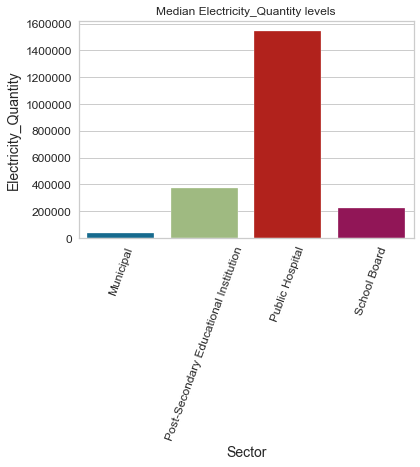

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


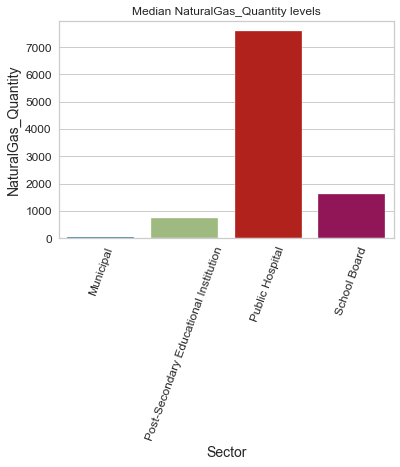

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


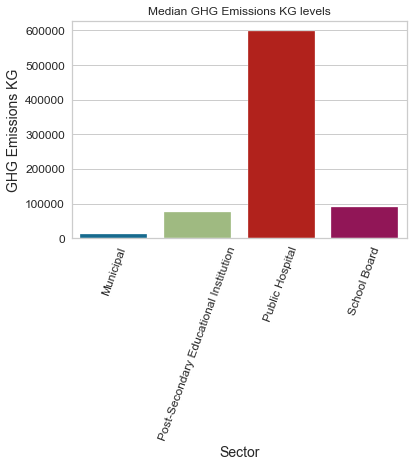

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


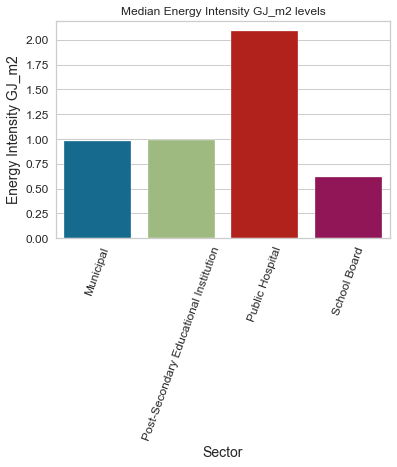

In [315]:
print(df['Sector'].value_counts())
energy_consump = ['Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity GJ_m2']
index = 0
for name in energy_consump:
    sector_pivot = df.groupby('Sector')[name].median().reset_index()
    sns.barplot(sector_pivot.Sector, 
                sector_pivot[name])
    index += 1
    plt.xticks(rotation=70)
    plt.title(f'Median {name} levels')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

Municipality               11133
School Board                4890
College                      513
Acute/Chronic Hospital       290
University                   227
Municipal Service Board       68
Acute Hospital                48
Chronic Hospital              24
Name: SubSector, dtype: int64


/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


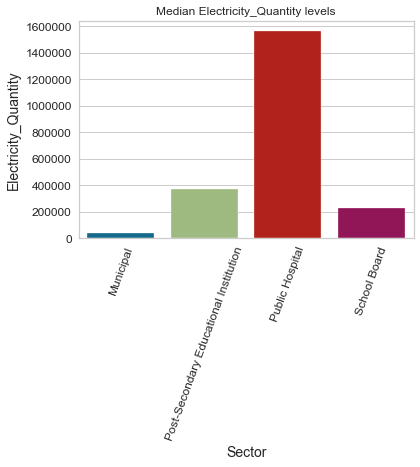

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


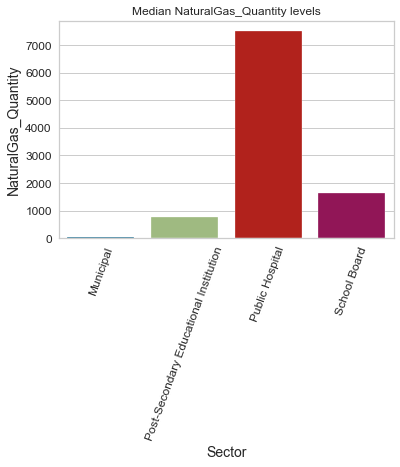

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


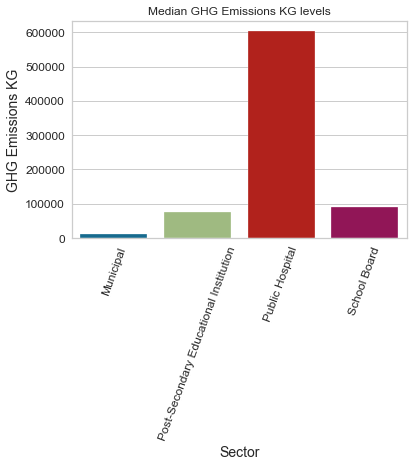

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


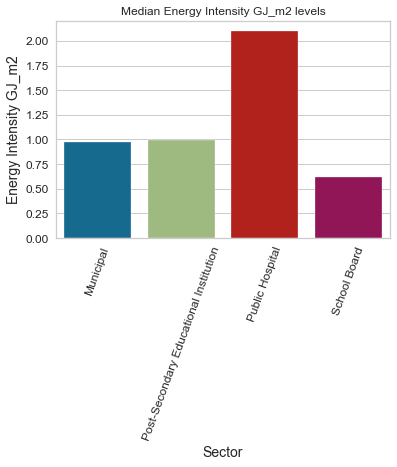

In [229]:
print(df['SubSector'].value_counts())
energy_consump = ['Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity GJ_m2']
index = 0
for name in energy_consump:
    sector_pivot = df.groupby('Sector')[name].median().reset_index()
    sns.barplot(sector_pivot.Sector, 
                sector_pivot[name])
    index += 1
    plt.xticks(rotation=70)
    plt.title(f'Median {name} levels')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

#### 3.2 Visualize Median GHG levels for SubSectors

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


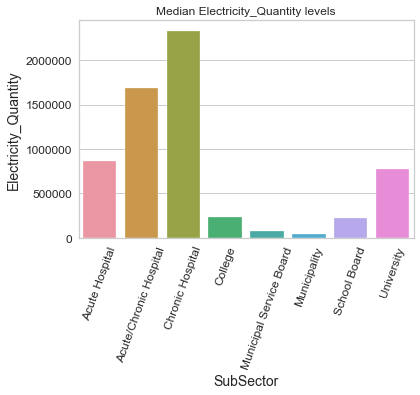

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


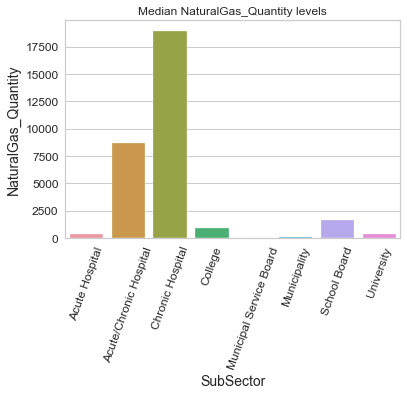

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


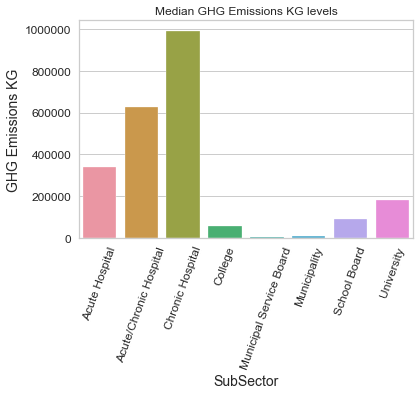

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


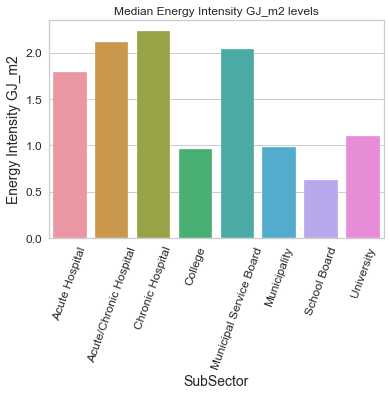

In [230]:
for name in energy_consump:
    subsector_pivot = df.groupby('SubSector')[name].median().reset_index()
    sns.barplot(subsector_pivot.SubSector, 
                subsector_pivot[name])
    index += 1
    plt.xticks(rotation=70)
    plt.title(f'Median {name} levels')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

#### 3.3 Classify data column types

In [231]:
cat_features = ["Sector", "SubSector"]
bin_cat_features = ["Swimming Pool", "DistrictHeating_IsRenewable", "DistrictCooling_IsRenewable"]
target_feature = ["GHG Emissions KG"]
for cat in cat_features + bin_cat_features:
  print(df[cat].unique())
  print(f"{cat} null value count", df[cat].isnull().sum())

num_features = ["Total Indoor Space_x", "Weekly Average Hours", "Annual Flow (M", "Number of Portables",
                "Electricity_Quantity", "NaturalGas_Quantity", "FuelOil12_Quantity",
                "FuelOil46_Quantity", "Propane_Quantity", "Coal_Quantity", "Wood_Quantity",
                "DistrictHeating_Quantity", "DistrictCooling_Quantity", "Energy Intensity ekWh_sqft", "GHG Emissions KG"]

df[num_features].describe()

['Public Hospital' 'School Board' 'Post-Secondary Educational Institution'
 'Municipal']
Sector null value count 0
['Acute/Chronic Hospital' 'School Board' 'University' 'College'
 'Acute Hospital' 'Municipality' 'Chronic Hospital'
 'Municipal Service Board']
SubSector null value count 0
['0' '1']
Swimming Pool null value count 0
['0' '1']
DistrictHeating_IsRenewable null value count 0
['0' '1']
DistrictCooling_IsRenewable null value count 0


,Total Indoor Space_x,Weekly Average Hours,Annual Flow (M,Number of Portables,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Coal_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictCooling_Quantity,Energy Intensity ekWh_sqft,GHG Emissions KG
count,1.719300e+04,17193.000000,1.507700e+04,17167.000000,1.719300e+04,1.717600e+04,17168.000000,17167.000000,17171.000000,17167.000000,17168.000000,1.716700e+04,17167.000000,1.719300e+04,1.719300e+04
mean,1.241911e+04,85.641081,2.787275e+04,0.457214,5.817959e+05,2.600727e+03,472.015647,51.140325,987.286365,0.000058,0.014626,9.883564e+03,78.809313,4.209161e+04,7.358794e+05
std,4.885909e+05,54.308046,1.821700e+06,1.833198,3.572563e+06,2.291152e+04,7570.526783,3884.167589,10069.782083,0.007632,1.181152,9.907602e+05,3971.610577,8.062609e+05,5.877230e+07
min,0.000000e+00,0.010000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.047300e-08
25%,1.340000e+02,40.000000,0.000000e+00,0.000000,2.155016e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.247527e+01,4.678824e+03
50%,8.694792e+02,70.000000,0.000000e+00,0.000000,1.059256e+05,3.912993e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.990862e+01,3.146178e+04
75%,3.777769e+03,167.980000,0.000000e+00,0.000000,3.226400e+05,1.645961e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.614304e+01,9.693396e+04
max,3.584064e+07,168.000000,1.645568e+08,50.000000,2.109563e+08,1.568648e+06,552651.400000,500470.000000,740929.000000,1.000000,120.000000,1.216918e+08,466694.460904,3.715736e+07,7.217241e+09


Since this data has too many dimensions, it needs to be dimensionally reduced.

#### 3.4 Visualize target feature

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

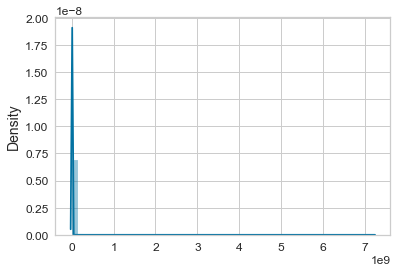

In [232]:
sns.distplot(df[target_feature])

#### 3.5 Visualize `Swimming Pool`, `DistrictHeating_IsRenewable` and `DistrictCooling_IsRenewable` vs target feature

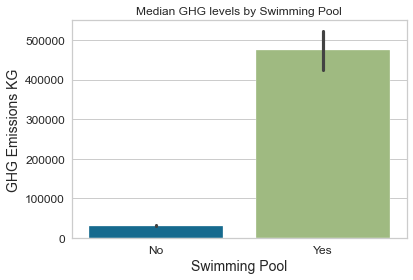

In [233]:
ax=sns.barplot(data=df, x="Swimming Pool", y="GHG Emissions KG", estimator=np.median)
plt.title('Median GHG levels by Swimming Pool')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
plt.show()

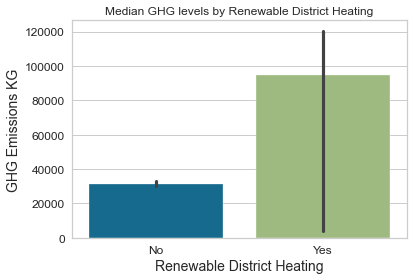

In [234]:
ax=sns.barplot(data=df, x="DistrictHeating_IsRenewable", y="GHG Emissions KG", estimator=np.median)
plt.title('Median GHG levels by Renewable District Heating')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
ax.set_xlabel('Renewable District Heating')
plt.show()

In [235]:
df['DistrictCooling_IsRenewable'].value_counts()

0    17181
1       12
Name: DistrictCooling_IsRenewable, dtype: int64

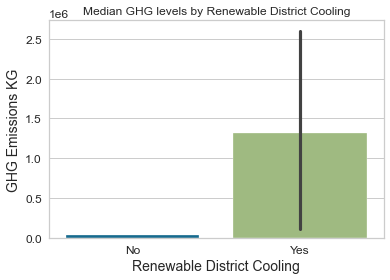

In [236]:
ax=sns.barplot(data=df, x="DistrictCooling_IsRenewable", y="GHG Emissions KG", estimator=np.median)
plt.title('Median GHG levels by Renewable District Cooling')
labels = ['No', 'Yes']
ax.set_xlabel('Renewable District Cooling')
ax.set_xticklabels(labels)
plt.show()

#### 3.6 Find correlation

In [237]:
df.corr()

,Total Indoor Space_x,Weekly Average Hours,Annual Flow (M,Number of Portables,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Coal_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre,Emission per Space,Over Emission Median
Total Indoor Space_x,1.000000,0.006804,-0.000400,-0.002474,0.030925,0.030749,0.011997,0.011585,-0.001755,-0.000141,0.000610,0.001557,0.001545,0.002544,0.001055,0.002219,-0.001326,-0.000626,-0.001326,-0.000626,-0.000943,-0.018480
Weekly Average Hours,0.006804,1.000000,0.021107,-0.103007,0.104461,0.054687,-0.002909,-0.004126,-0.036681,-0.005010,-0.008562,0.015015,0.002437,0.004897,0.003743,0.016233,0.053126,0.028714,0.053126,0.028714,0.043106,0.314404
Annual Flow (M,-0.000400,0.021107,1.000000,-0.004097,0.002453,-0.000779,-0.000701,-0.000215,-0.001559,-0.000125,-0.000203,-0.000163,-0.000297,-0.000291,-0.000282,-0.000174,-0.000320,-0.000442,-0.000320,-0.000442,0.000633,0.015824
Number of Portables,-0.002474,-0.103007,-0.004097,1.000000,-0.003440,-0.000456,-0.007561,-0.002958,-0.017153,-0.001904,-0.002553,-0.002488,-0.004536,-0.004901,-0.006042,-0.002510,-0.013026,-0.006730,-0.013026,-0.006730,-0.009296,-0.198050
Electricity_Quantity,0.030925,0.104461,0.002453,-0.003440,1.000000,0.729179,0.344091,0.268159,0.001738,-0.000836,0.016723,0.069082,0.071899,0.070591,0.041486,0.085268,0.178954,0.000379,0.178954,0.000379,0.112626,0.079759
NaturalGas_Quantity,0.030749,0.054687,-0.000779,-0.000456,0.729179,1.000000,0.333776,0.228449,-0.007435,-0.000661,0.031153,0.039084,-0.000710,0.082475,0.000694,0.059998,0.015850,0.000110,0.015850,0.000110,0.034957,0.060022
FuelOil12_Quantity,0.011997,-0.002909,-0.000701,-0.007561,0.344091,0.333776,1.000000,0.003330,0.088027,-0.000475,0.001996,-0.000264,-0.001133,0.000673,-0.001396,0.007246,-0.003254,-0.001682,-0.003254,-0.001682,-0.002583,0.050398
FuelOil46_Quantity,0.011585,-0.004126,-0.000215,-0.002958,0.268159,0.228449,0.003330,1.000000,-0.000481,-0.000100,-0.000135,-0.000131,-0.000239,-0.000261,-0.000319,0.005016,-0.000687,-0.000355,-0.000687,-0.000355,-0.000474,0.012537
Propane_Quantity,-0.001755,-0.036681,-0.001559,-0.017153,0.001738,-0.007435,0.088027,-0.000481,1.000000,-0.000747,0.005764,-0.000977,-0.001782,-0.001937,-0.002370,-0.000824,-0.005113,-0.002645,-0.005113,-0.002645,-0.003605,0.042061
Coal_Quantity,-0.000141,-0.005010,-0.000125,-0.001904,-0.000836,-0.000661,-0.000475,-0.000100,-0.000747,1.000000,0.010154,-0.000076,NaN,-0.000151,-0.000185,-0.000090,-0.000399,-0.000206,-0.000399,-0.000206,-0.000284,-0.007632


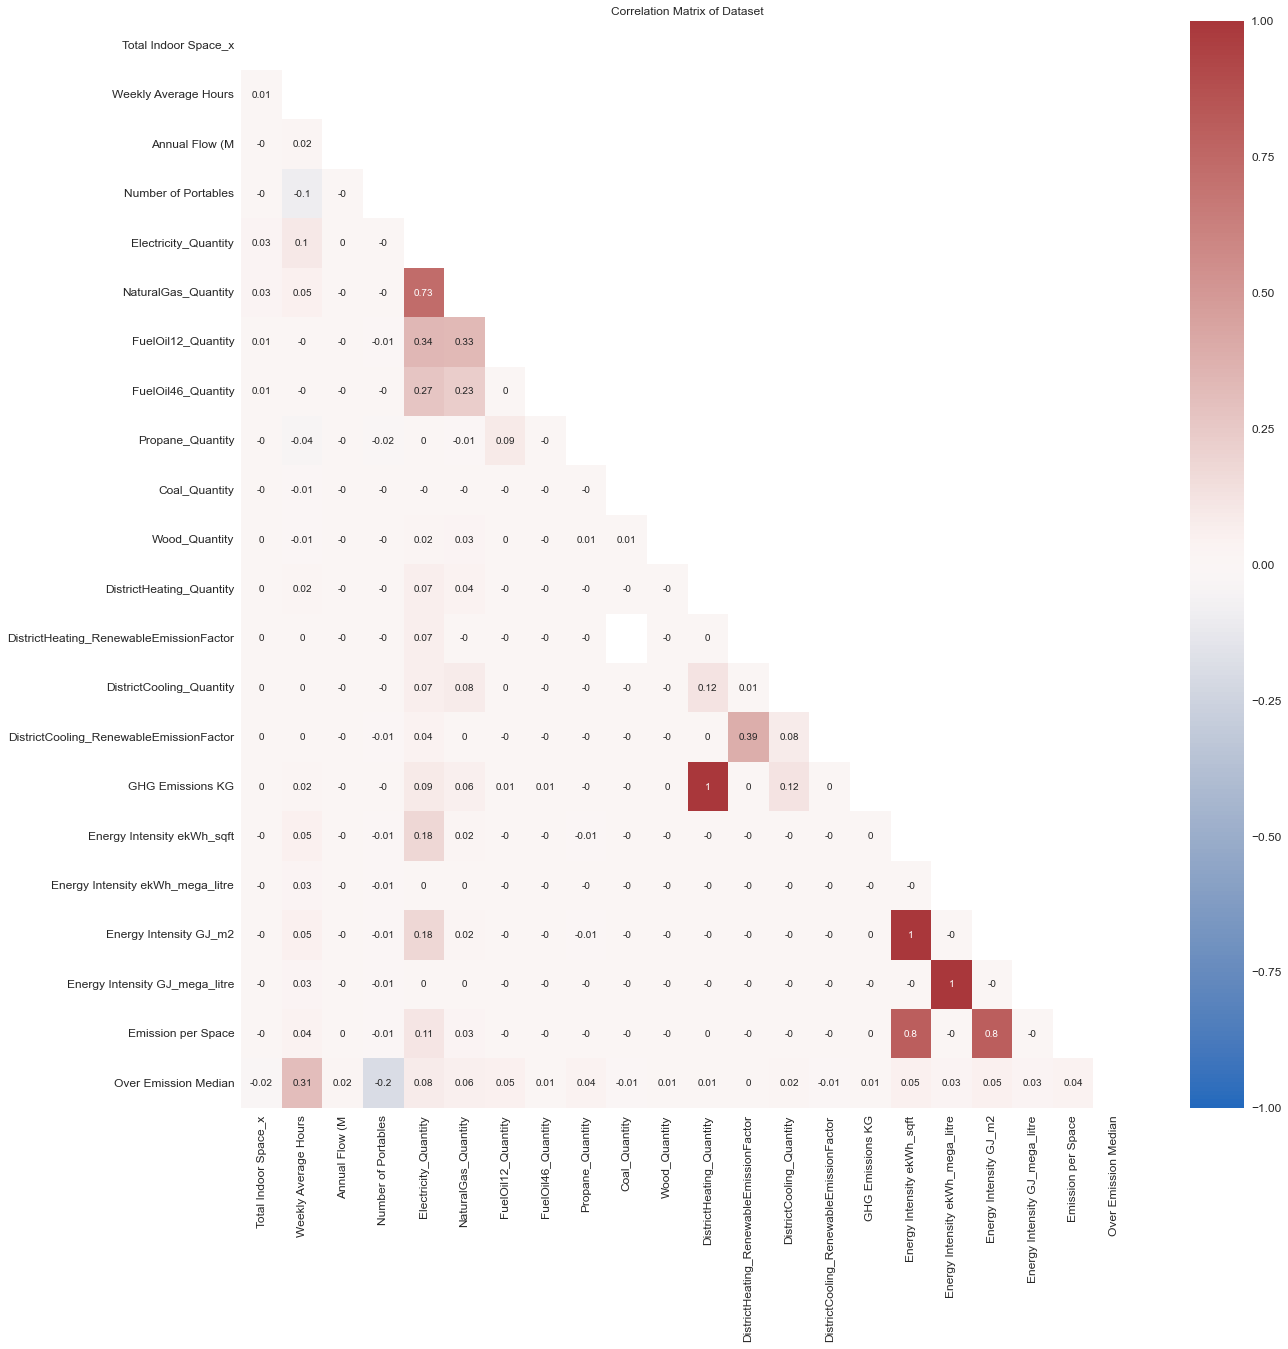

In [238]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Correlation Matrix of Dataset')
plt.savefig('heatmap.png')

Greenhouse gases show a very high correlation between district heating and cooling.

#### 3.7 Checking outliers

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


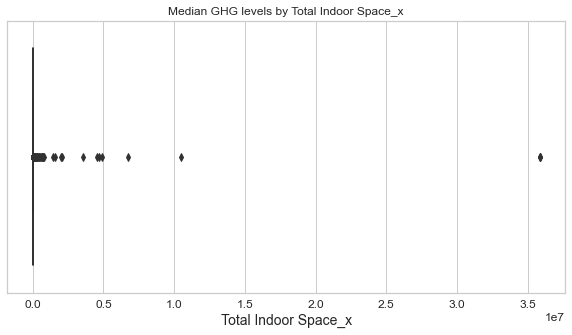

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


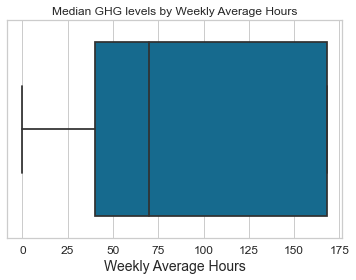

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


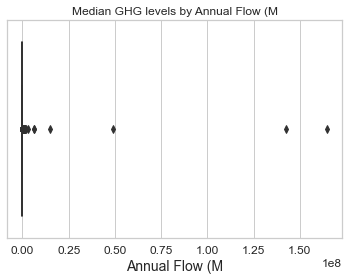

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


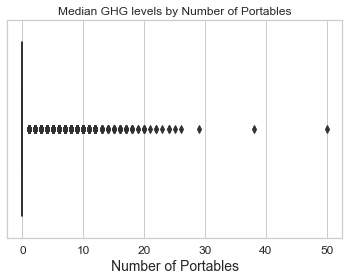

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


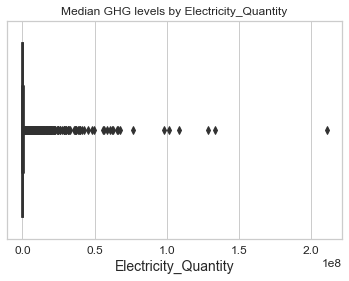

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


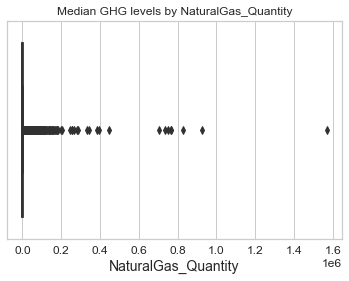

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


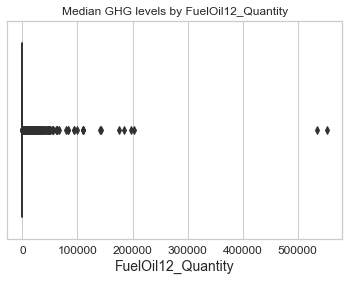

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


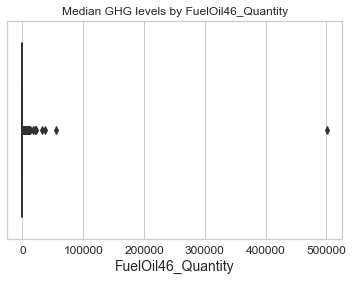

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


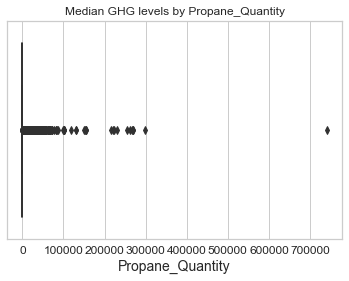

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


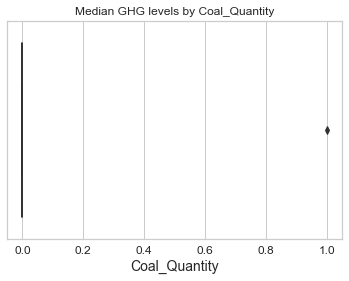

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


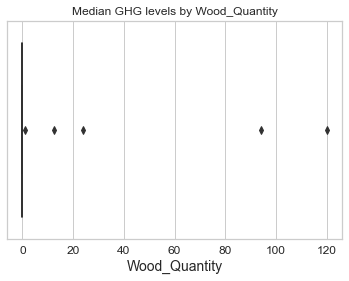

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


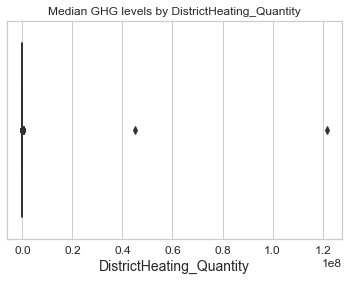

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


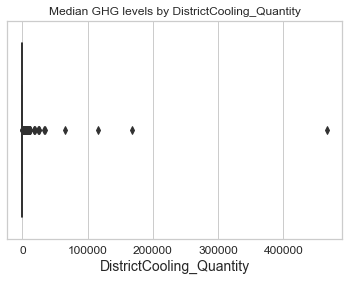

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


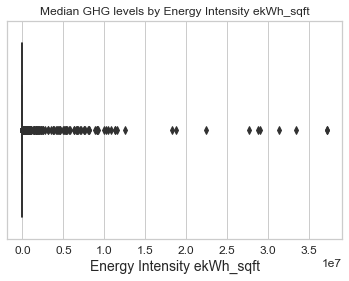

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


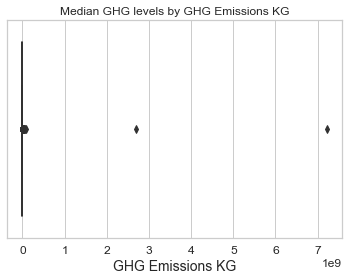

In [239]:
plt.figure(figsize=(10, 5))

for feature in num_features:
  sns.boxplot(df[feature])
  plt.title(f'Median GHG levels by {feature}')
  plt.show()

#### 3.9 Data tranformation

1. The target has extreme outliers. Thus transform this variable by taking its logarithm.
2. This data needs to be regulated because of the wide range of numbers. If only the MinMaxScaler is applied, the value of the data becomes infinitely small. Therefore, after scaling with the standard normal distribution, apply MinMax.

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

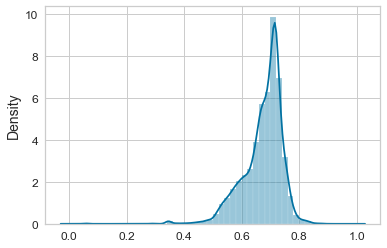

In [240]:
y = np.log(df[target_feature])
y = MinMaxScaler().fit_transform(y)
sns.distplot(y)

Clean data with heavy outliers.

In [241]:
df = df.drop(df.loc[df['Total Indoor Space_x'] > np.float64(3.0+1e7)].index)
df = df.drop(df.loc[df['Electricity_Quantity'] > np.float64(2.0+1e8)].index)
df = df.drop(df.loc[df['FuelOil12_Quantity'] > np.float64(500000)].index)
df = df.drop(df.loc[df['Propane_Quantity'] > np.float64(700000)].index)

Determine if it has a normal distribution.

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


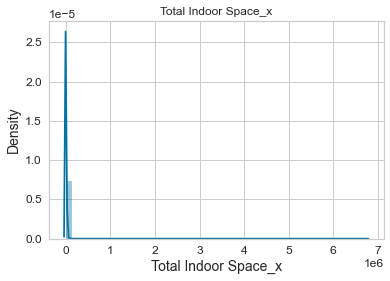

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


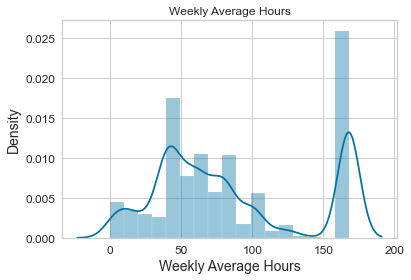

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


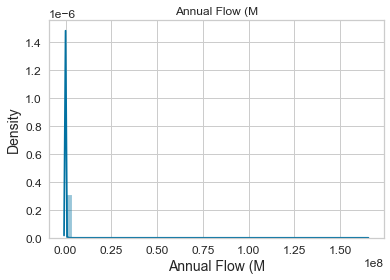

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


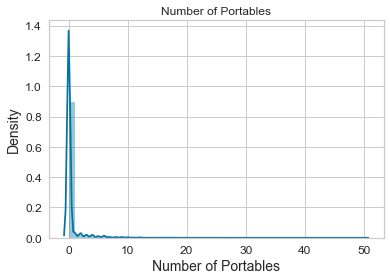

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


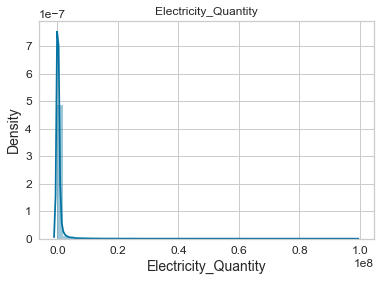

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


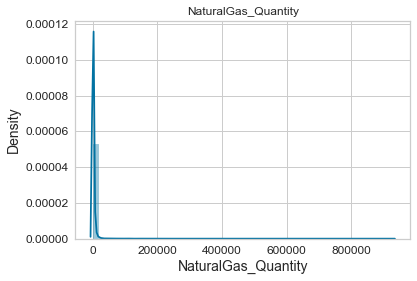

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


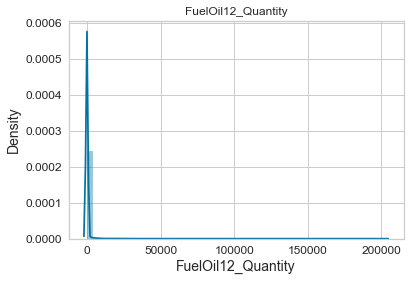

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


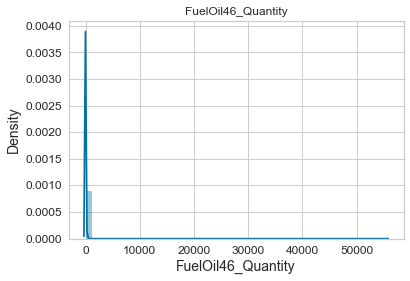

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


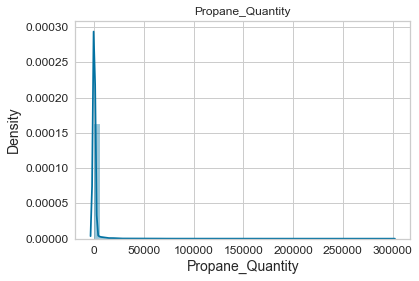

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


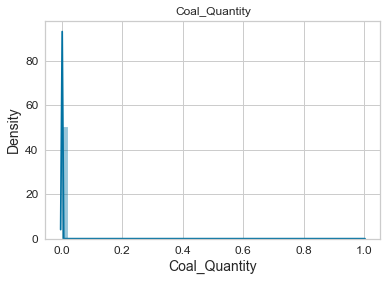

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


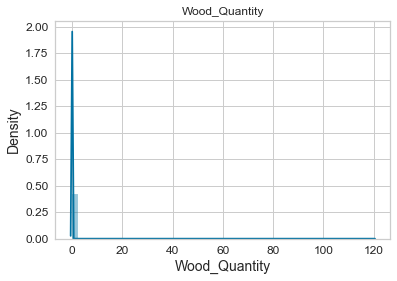

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


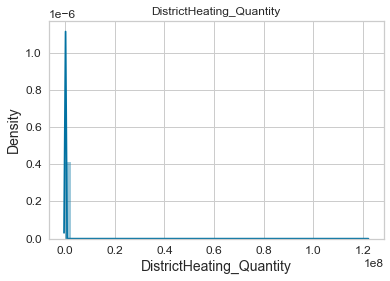

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


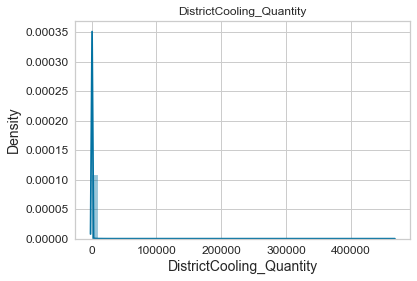

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


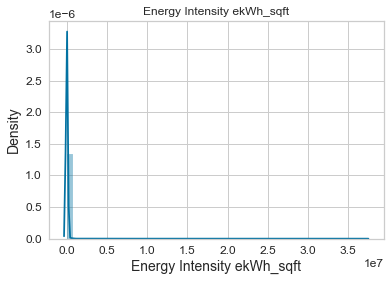

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


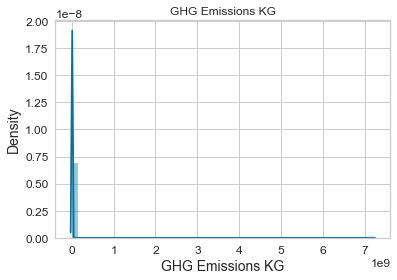

In [242]:
for feature in num_features:
  sns.distplot(df[feature])
  plt.title(f'{feature}')
  plt.show()

Apply the logarithmic function to all data except Weekly average hours.

In [243]:
log_df = df.copy()

for feature in num_features:
  if feature != "Weekly Average Hours":
    log_df[feature] = np.log1p(log_df[feature])

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


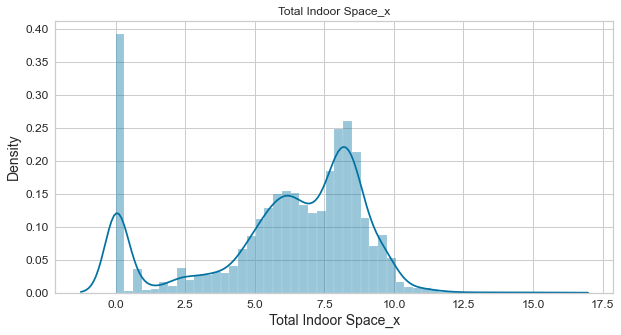

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


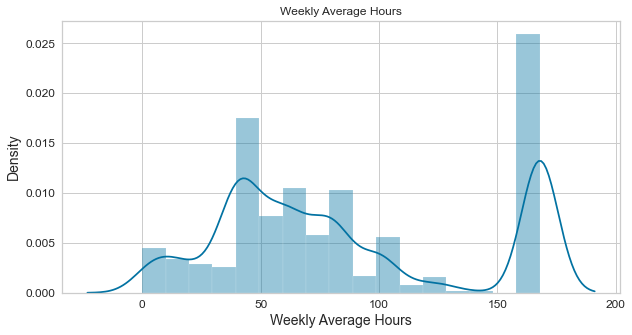

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


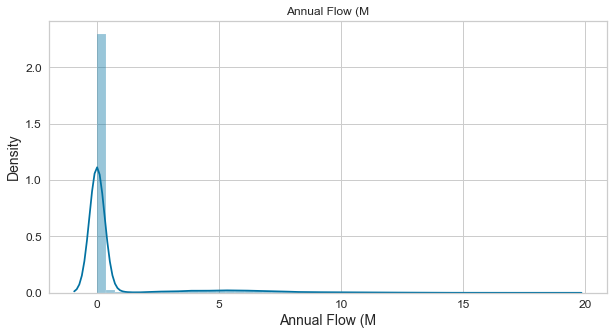

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


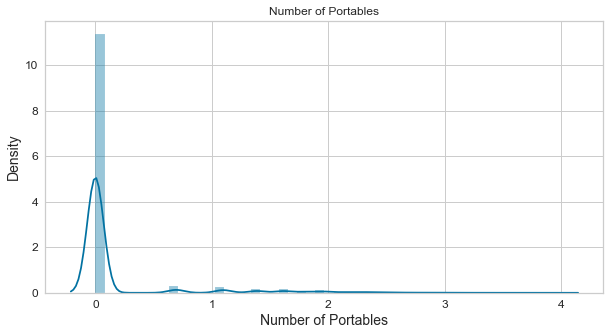

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


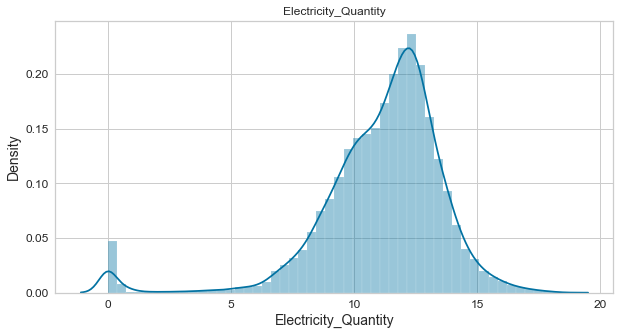

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


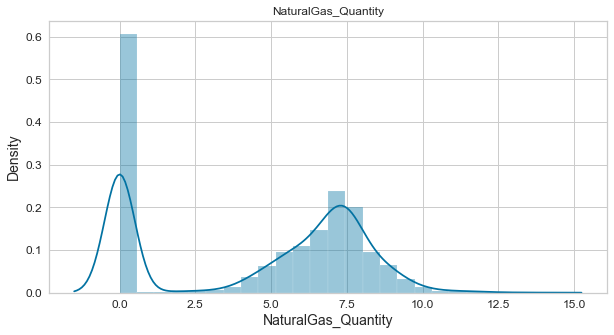

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


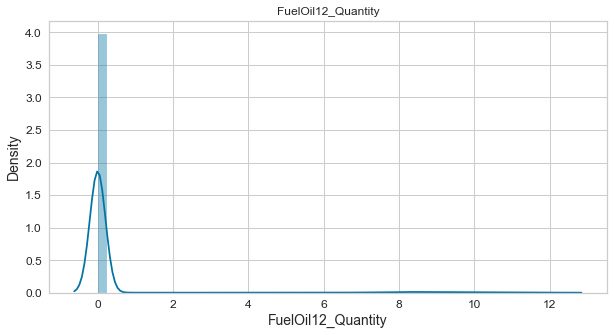

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


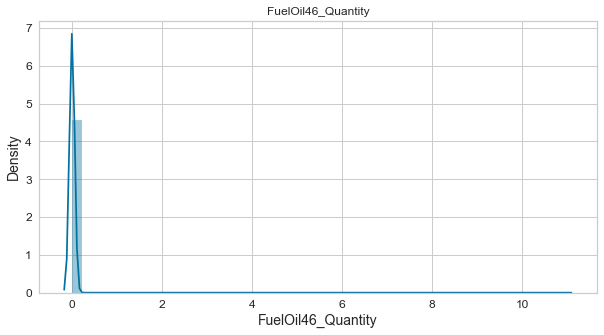

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


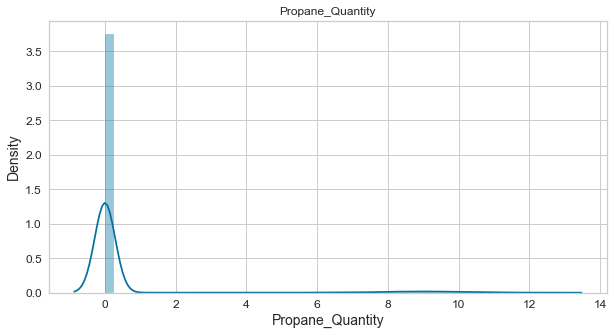

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


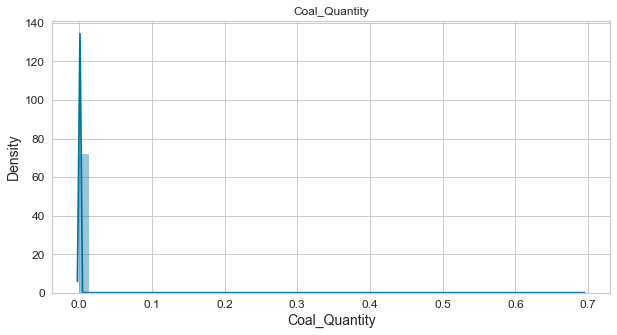

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


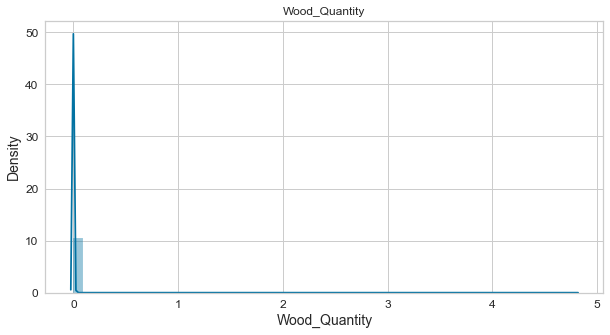

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


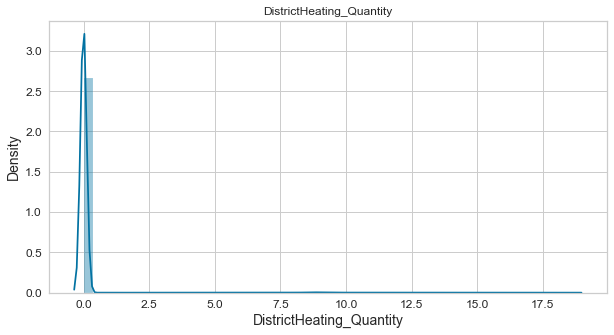

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


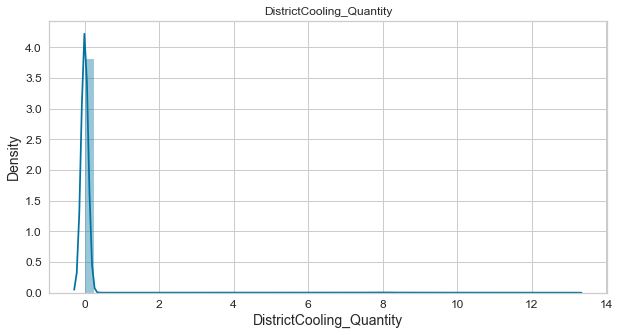

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


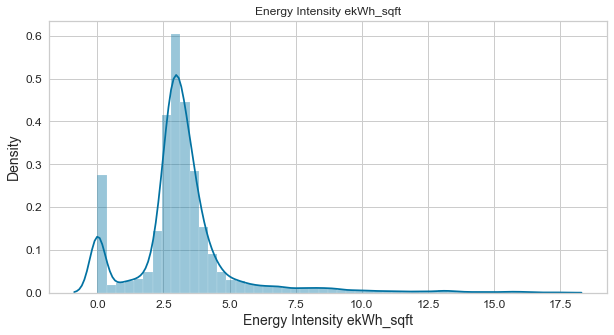

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


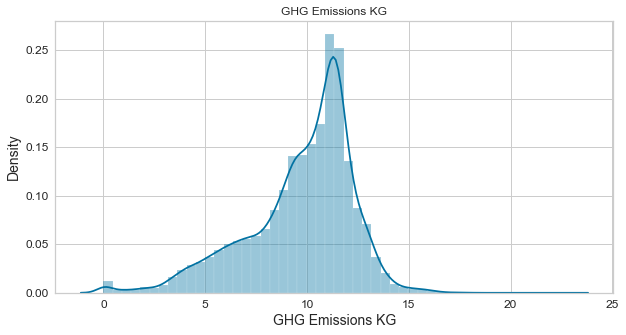

In [244]:
for feature in num_features:
  plt.figure(figsize=(10, 5))
  sns.distplot(log_df[feature])
  plt.title(f'{feature}')
  plt.show()

## 3. Data Transform

In [245]:

# Categorical - impute, one hot encode
cat_impute_step = ('cat impute', SimpleImputer(strategy='constant', fill_value='Other'))
cat_encode_step = ('cat encode', OneHotEncoder(sparse=False))
cat_steps = [cat_impute_step, cat_encode_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('category transformers', cat_pipe, cat_features)]

# Binary Categorical - impute, one hot encode
bin_cat_features_encode_step = ('bin cat encode', OneHotEncoder(sparse=False))
bin_cat_features_steps = [bin_cat_features_encode_step]
bin_cat_features_pipe = Pipeline(bin_cat_features_steps)
bin_cat_features_transformers = [('binary category transformers', cat_pipe, bin_cat_features)]

# Numerical - impute, scale
num_impute_step = ('num impute', SimpleImputer(strategy='median'))
num_scale_step = ('num scale', MinMaxScaler())
num_steps = [num_impute_step, num_scale_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('numeric transformers', num_pipe, num_features)]

In [246]:
ct = ColumnTransformer(transformers=cat_transformers + bin_cat_features_transformers + num_transformers)

X = ct.fit_transform(log_df[cat_features + bin_cat_features + num_features])
X.shape
# y defined in data cleaning part

(17182, 33)

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

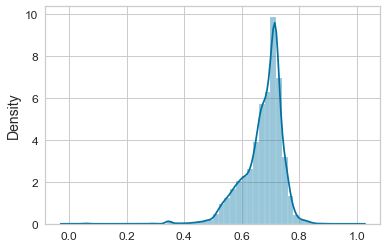

In [247]:
y = np.log(df[target_feature])
y = MinMaxScaler().fit_transform(y)
sns.distplot(y)

In [248]:
print(np.isnan(X).sum(),
      np.isnan(y).sum(),
      np.isinf(X).sum(),
      np.isinf(y).sum())

0 0 0 0


## 4. Supervised Learning

#### 4.1 Classification Model to Predict 'Sector'
##### Objective: We would like to use 'Sector' as our target (y) and other features as our predictors (x) to predict the result of 'Sector'. 

In [249]:
sector_target = "Sector"

In [250]:
ct = ColumnTransformer(transformers=bin_cat_features_transformers + num_transformers)
X_sector = ct.fit_transform(log_df[bin_cat_features + num_features])
X_sector.shape

(17182, 21)

In [251]:
y_sector = LabelEncoder().fit_transform(log_df[sector_target])
y_sector

array([2, 2, 3, ..., 0, 0, 0])

In [252]:
y_sector.shape

(17182,)

In [253]:
# KNN
# fit the data and predict it with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
 
knn.fit(X_sector,y_sector)
prediction = knn.predict(X_sector)
print('Prediction: {}'.format(prediction))

Prediction: [2 2 0 ... 0 3 0]


In [254]:
# Measuring model performance:
# train test split 
# (test_size: percentage of test size. Example test_size = 0.2, test size = 20% and train size = 80%)
from sklearn.model_selection import train_test_split
X_sector_train,X_sector_test,y_sector_train,y_sector_test = train_test_split(X_sector,y_sector,test_size = 0.2,random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_sector_train,y_sector_train)

prediction = knn.predict(X_sector_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(X_sector_test,y_sector_test)) # accuracy

With KNN (K=3) accuracy is:  0.9103869653767821


In [255]:
#Note for Model complexity:
#K is hyperparameter and we need to choose it that gives best performace.
#If k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
#If k is big, model that is less complex model can lead to underfit.

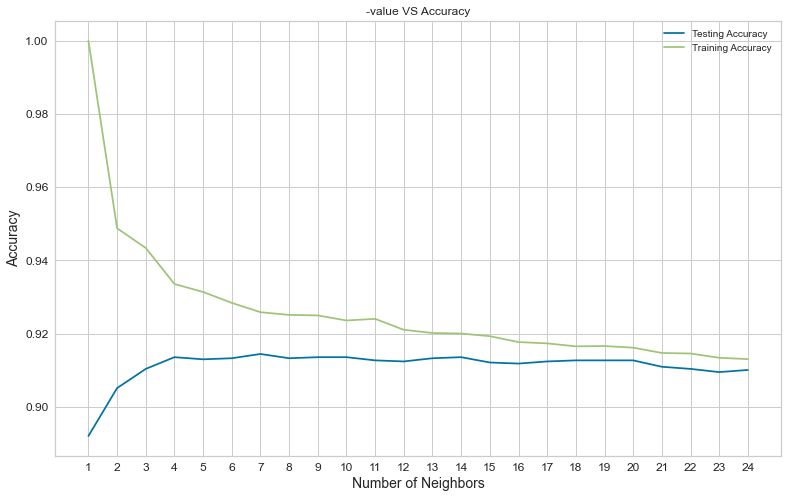

Best accuracy is 0.9144602851323829 with K = 7


In [256]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_sector_train,y_sector_train)
    #train accuracy
    train_accuracy.append(knn.score(X_sector_train, y_sector_train))
    # test accuracy
    test_accuracy.append(knn.score(X_sector_test, y_sector_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

For the chart above, it ranges K value from 1 to 25(exclude) and find accuracy for each K value. 
As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). 
Also if K is 7, model is still overfit but it has the best accuracy performance. 
So we choose K=7

In [257]:
#Use K=7

# Measuring model performance:
# train test split 
# (test_size: percentage of test size. Example test_size = 0.2, test size = 20% and train size = 80%)
from sklearn.model_selection import train_test_split
X_sector_train,X_sector_test,y_sector_train,y_sector_test = train_test_split(X_sector,y_sector,test_size = 0.2,random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_sector_train,y_sector_train)

prediction = knn.predict(X_sector_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=7) accuracy is: ',knn.score(X_sector_test,y_sector_test)) # accuracy

With KNN (K=7) accuracy is:  0.9144602851323829


#### 4.2 Model to Predict 'GHG Level'
#### Objective: this section would like to do the prediction for GHG Emission
####                    Create bins for GHG Emissions ('GHG Level') and predict the 'GHG Level'
#### 4.2.1 Model to Predict 'GHG Level' 

In [281]:
df0=log_df

In [284]:
X_R_S0 = ct.fit_transform(df0[bin_cat_features + num_features])
y_GHG = df0['GHG Emissions KG']

In [285]:
print(min(y_GHG))
print(max(y_GHG))

3.047299953569814e-08
22.69973858321476


In [286]:
SLR = ["[{0}] - {1})".format(SLC,SLC+1)for SLC in range(0,22,1)]
C_SLR = len(SLR)
print(SLR)
print(C_SLR)

['[0] - 1)', '[1] - 2)', '[2] - 3)', '[3] - 4)', '[4] - 5)', '[5] - 6)', '[6] - 7)', '[7] - 8)', '[8] - 9)', '[9] - 10)', '[10] - 11)', '[11] - 12)', '[12] - 13)', '[13] - 14)', '[14] - 15)', '[15] - 16)', '[16] - 17)', '[17] - 18)', '[18] - 19)', '[19] - 20)', '[20] - 21)', '[21] - 22)']
22


In [287]:
df0['GHG_Range'] = pd.cut(x=df0['GHG Emissions KG'],bins=C_SLR,labels = SLR)

In [294]:
df0['GHG_Range'].value_counts()

[10] - 11)    3778
[11] - 12)    3231
[9] - 10)     2600
[8] - 9)      1843
[12] - 13)    1224
[7] - 8)      1115
[6] - 7)       958
[5] - 6)       775
[4] - 5)       556
[3] - 4)       340
[13] - 14)     316
[0] - 1)       120
[2] - 3)       103
[14] - 15)      89
[1] - 2)        71
[15] - 16)      52
[16] - 17)       7
[17] - 18)       2
[21] - 22)       2
[18] - 19)       0
[19] - 20)       0
[20] - 21)       0
Name: GHG_Range, dtype: int64

In [288]:
y_R_S0 = df0['GHG_Range'] 

In [289]:
# (test_size: percentage of test size. Example test_size = 0.2, test size = 20% and train size = 80%)
X_RS0_train,X_RS0_test,y_RS0_train,y_RS0_test = train_test_split(X_R_S0,y_R_S0,test_size = 0.2,random_state = 1)

In [295]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [292]:
#1. SVC
svm_clf = SVC(kernel="rbf", gamma=0.5, C=20, random_state=0)
svm_clf.fit(X_RS0_train, y_RS0_train)
y_RS0_pred = svm_clf.predict(X_RS0_test)
print("Accuracy Score", accuracy_score(y_RS0_test, y_RS0_pred))

Accuracy Score 0.9426825720104742


In [303]:
#2. Decision Tree
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2)
model = clf.fit(X_RS0_train, y_RS0_train)

y_RS0_pred = clf.predict(X_RS0_test)
print(confusion_matrix(y_RS0_test, y_RS0_pred))
print(classification_report(y_RS0_test, y_RS0_pred))
print(accuracy_score(y_RS0_test, y_RS0_pred))

[[ 25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 734   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 639   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 221   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  56   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  19   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0  11   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

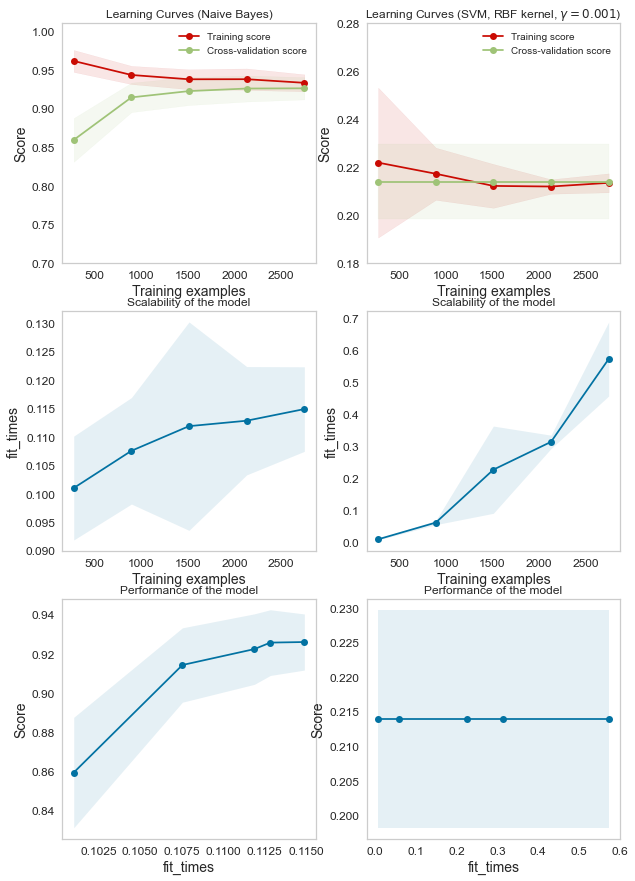

In [307]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
#estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X_RS0_test,
    y_RS0_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_RS0_test, y_RS0_pred, axes=axes[:, 1], ylim=(0.18, 0.28), cv=cv, n_jobs=4
)

plt.show()

In [298]:
#3. Random Forest
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_RS0_train, y_RS0_train)

y_RS0_pred = rnd_clf.predict(X_RS0_test)
#print(confusion_matrix(y_RS0_test, y_RS0_pred))
#print(classification_report(y_RS0_test, y_RS0_pred))
print(accuracy_score(y_RS0_test, y_RS0_pred))

0.9275530986325283


In [299]:
#4. Gradient Boosted Trees
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_RS0_train, y_RS0_train)

y_RS0_pred = clf.predict(X_RS0_test)
print(accuracy_score(y_RS0_test, y_RS0_pred))

0.999127145766657


In [300]:
#5. AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_RS0_train, y_RS0_train)

y_RS0_pred = clf.predict(X_RS0_test)
print(accuracy_score(y_RS0_test, y_RS0_pred))

0.4082048297934245


In [317]:
#6. Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_RS0_train, y_RS0_train)

y_RS0_pred = clf.predict(X_RS0_test)
print(accuracy_score(y_RS0_test, y_RS0_pred))

0.9802153040442246


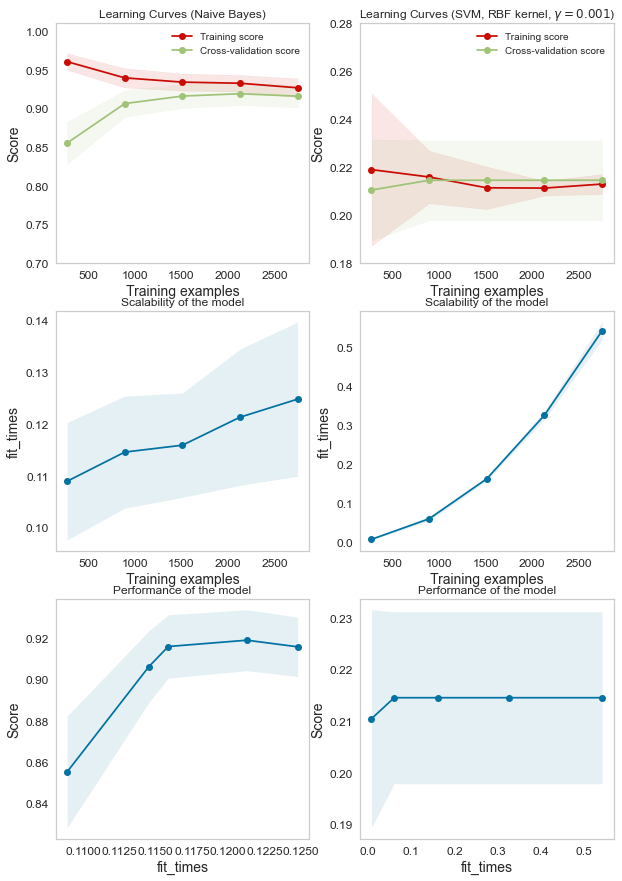

In [318]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
#estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X_RS0_test,
    y_RS0_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_RS0_test, y_RS0_pred, axes=axes[:, 1], ylim=(0.18, 0.28), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
#Draft Code 

In [41]:
print(cat_features)
print(bin_cat_features)
print(num_features)
print(target_feature)

['Sector', 'SubSector']
['Swimming Pool', 'DistrictHeating_IsRenewable', 'DistrictCooling_IsRenewable']
['Total Indoor Space_x', 'Weekly Average Hours', 'Annual Flow (M', 'Number of Portables', 'Electricity_Quantity', 'NaturalGas_Quantity', 'FuelOil12_Quantity', 'FuelOil46_Quantity', 'Propane_Quantity', 'Coal_Quantity', 'Wood_Quantity', 'DistrictHeating_Quantity', 'DistrictCooling_Quantity', 'Energy Intensity ekWh_sqft', 'GHG Emissions KG']
['GHG Emissions KG']


In [46]:
df['Sector'].unique()

array(['Public Hospital', 'School Board',
       'Post-Secondary Educational Institution', 'Municipal'],
      dtype=object)

In [125]:
df1=log_df[log_df['Sector'] =='Public Hospital']

In [126]:
#'Sector' =='Public Hospital'
#ct = ColumnTransformer(transformers=cat_transformers + bin_cat_features_transformers + num_transformers)
X_R_S1 = ct.fit_transform(df1[bin_cat_features + num_features])
X_R_S1.shape

(361, 19)

In [112]:
y_GHG = df1['GHG Emissions KG']
#y_GHG = LabelEncoder().fit_transform(df1['GHG Emissions KG'])
y_GHG.shape

(361,)

In [114]:
print(min(y_GHG))
print(max(y_GHG))

3.5131951671016064
22.69973858321476


In [170]:
SLR = ["[{0}] - {1})".format(SLC,SLC+2.0)for SLC in range(0,22,2)]
C_SLR = len(SLR)
print(SLR)
print(C_SLR)

['[0] - 2.0)', '[2] - 4.0)', '[4] - 6.0)', '[6] - 8.0)', '[8] - 10.0)', '[10] - 12.0)', '[12] - 14.0)', '[14] - 16.0)', '[16] - 18.0)', '[18] - 20.0)', '[20] - 22.0)']
11


In [173]:
df1['GHG_Range'] = pd.cut(x=df1['GHG Emissions KG'],bins=C_SLR,labels = SLR)

/var/folders/8_/95t5l5k52b19l6v1k8wxncp80000gn/T/ipykernel_85134/486000983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GHG_Range'] = pd.cut(x=df1['GHG Emissions KG'],bins=C_SLR,labels = SLR)


In [174]:
y_R_S1 = df1['GHG_Range'] 
y_R_S1.shape

(361,)

In [175]:
# (test_size: percentage of test size. Example test_size = 0.2, test size = 20% and train size = 80%)
X_RS1_train,X_RS1_test,y_RS1_train,y_RS1_test = train_test_split(X_R_S1,y_R_S1,test_size = 0.2,random_state = 1)

In [176]:
#1. SVC
svm_clf = SVC(kernel="rbf", gamma=0.5, C=20, random_state=0)
svm_clf.fit(X_RS1_train, y_RS1_train)
y_RS1_pred = svm_clf.predict(X_RS1_test)
print("Confusion Matrix\n", confusion_matrix(y_RS1_test, y_RS1_pred), "\n\n")
print("\t\t\tClassification Report\n", classification_report(y_RS1_test, y_RS1_pred))
print("Accuracy Score", accuracy_score(y_RS1_test, y_RS1_pred))

Confusion Matrix
 [[ 1  0  0  0  0  0  0  0  0]
 [ 0 17  2  0  0  0  0  0  2]
 [ 0  4 18  1  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  2  2  0]
 [ 0  0  0  0  0  0  1  9  0]
 [ 0  0  0  0  0  0  0  1  7]] 


			Classification Report
               precision    recall  f1-score   support

  [0] - 2.0)       1.00      1.00      1.00         1
[10] - 12.0)       0.81      0.81      0.81        21
[12] - 14.0)       0.86      0.78      0.82        23
[14] - 16.0)       0.50      0.67      0.57         3
[20] - 22.0)       0.00      0.00      0.00         1
  [2] - 4.0)       0.50      1.00      0.67         1
  [4] - 6.0)       0.67      0.40      0.50         5
  [6] - 8.0)       0.75      0.90      0.82        10
 [8] - 10.0)       0.78      0.88      0.82         8

    accuracy                           0.78        73
   macro avg       0.65      0.71      0.67        73
weighted avg       0.78      0.7

/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haoyuefeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
#2. Decision Tree
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2)
model = clf.fit(X_RS1_train, y_RS1_train)

y_RS1_pred = clf.predict(X_RS1_test)
print(confusion_matrix(y_RS1_test, y_RS1_pred))
print(classification_report(y_RS1_test, y_RS1_pred))
print(accuracy_score(y_RS1_test, y_RS1_pred))

[[ 1  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  1  9  0]
 [ 0  0  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

  [0] - 2.0)       1.00      1.00      1.00         1
[10] - 12.0)       1.00      1.00      1.00        21
[12] - 14.0)       1.00      1.00      1.00        23
[14] - 16.0)       1.00      1.00      1.00         3
[20] - 22.0)       1.00      1.00      1.00         1
  [2] - 4.0)       1.00      1.00      1.00         1
  [4] - 6.0)       0.83      1.00      0.91         5
  [6] - 8.0)       1.00      0.90      0.95        10
 [8] - 10.0)       1.00      1.00      1.00         8

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.98        73
weighted avg       0.99      0.99      0.99        73

0.9863013698630136


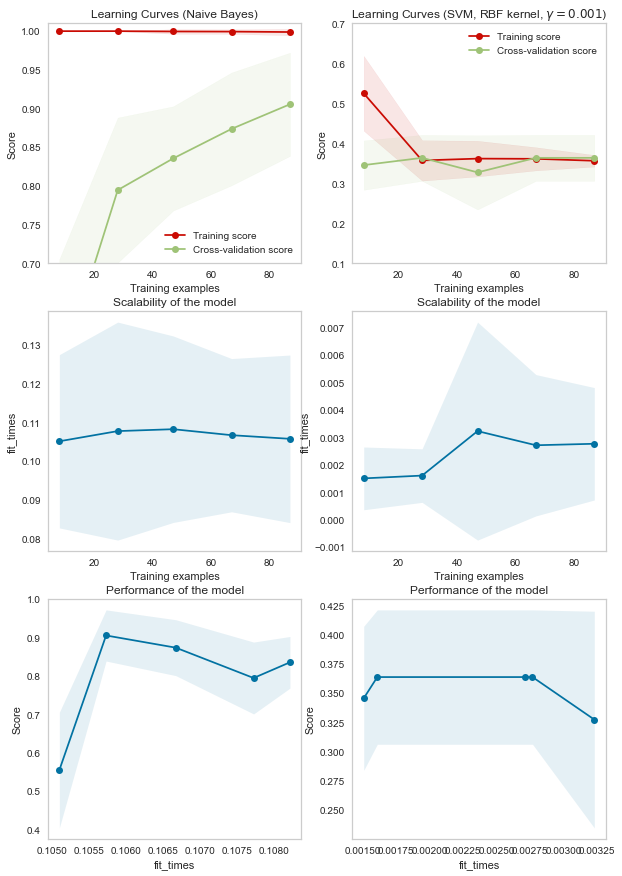

In [154]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
#estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X_RS1_test,
    y_RS1_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_RS1_test, y_RS1_pred, axes=axes[:, 1], ylim=(0.1, 0.7), cv=cv, n_jobs=4
)

plt.show()

In [178]:
#3. Random Forest
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_RS1_train, y_RS1_train)

y_RS1_pred = rnd_clf.predict(X_RS1_test)
#print(confusion_matrix(y_RS1_test, y_RS1_pred))
#print(classification_report(y_RS1_test, y_RS1_pred))
print(accuracy_score(y_RS1_test, y_RS1_pred))

0.9452054794520548


In [179]:
#4. Gradient Boosted Trees
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_RS1_train, y_RS1_train)

y_RS1_pred = clf.predict(X_RS1_test)
print(accuracy_score(y_RS1_test, y_RS1_pred))

0.9863013698630136


In [180]:
#5. AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_RS1_train, y_RS1_train)

y_RS1_pred = clf.predict(X_RS1_test)
print(accuracy_score(y_RS1_test, y_RS1_pred))

0.6301369863013698


In [181]:
#6. Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_RS1_train, y_RS1_train)

y_RS1_pred = clf.predict(X_RS1_test)
print(accuracy_score(y_RS1_test, y_RS1_pred))

0.863013698630137


In [ ]:
# Generally speaking, Decision Tree perfrom best then Gradient Boosted Trees.

In [ ]:
SVC
Decission Tree
RandomizedSearchCV
RandomForestClassifier
AdaBoost
Extra Trees Classifier
Gradient Boosted Trees

#### 4.2.2 Model to Predict 'GHG Level' for 'Sector' of 'School Board'

#### 4.2.3 Model to Predict 'GHG Level' for 'Sector' of 'Post-Secondary Educational Institution'

#### 4.2.4 Model to Predict 'GHG Level' for 'Sector' of 'Municipal'

## 5. Unsupervised Learning

#### Objective: Use predictors (X) and uncover hidden patterns among 'GHG Emissions KG' from unlabled data

In [ ]:
# KMeans Clustering


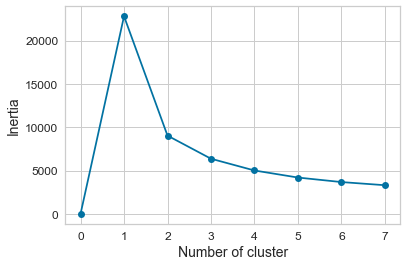

In [313]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#inertia: how spread out the clusters are distance from each sample
#lower inertia means more clusters
#There are low inertia and not too many cluster trade off so we can choose elbow

## 4. Modeling

#### 4.1 Model 1 - Clustering
##### Divide the groups through reinforcement learning and find out what the difference. Based on learning, we proceed with learning the classifier.

##### 4.1.1 Data preparation and tranformation

In [ ]:
model = KMeans()
plt.figure(figsize=(10, 5))
visualizer = KElbowVisualizer(model, metric="silhouette", k=(2,10))

visualizer.fit(X) 
visualizer.show()

In [ ]:
visualizer = KElbowVisualizer(model, metric="calinski_harabasz", k=(2,10))
visualizer.fit(X) 
visualizer.show()

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X)       
visualizer.show()       

we choose 3 as the cluster numbers. 

In [ ]:
cluster_num = 3
kmeans = KMeans(n_clusters=cluster_num)
y_pred = kmeans.fit_predict(X)

y_pred

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Logarithm GHG Emissions KG")

for index in range(0, cluster_num):
  display(pd.DataFrame((df[y_pred == index])[cat_features].value_counts(), 
                       columns=[f"Cluster {index}"]))
  display(pd.DataFrame((df[y_pred == index])[num_features].mean().astype(np.int64), 
                       columns=[f"Cluster {index}"]))
  sns.distplot(np.log1p((df[y_pred == index])['GHG Emissions KG']), 
               label=f"Cluster {index}")
  
plt.legend() 
plt.show()



Three significant characteristics were found.

In [ ]:
# Plot the results
plt.figure(figsize=(15, cluster_num*3))

for index in range(0, cluster_num):
  plt.subplot(int(np.ceil(cluster_num/2)), 2, index+1)
  cluster = X[y_pred==index, :]
  num_of_data = cluster.T[0].size
  
  plt.title(f"Cluster {index} - {num_of_data} data", {"fontsize": 20})
  plt.plot(cluster.T, alpha=0.6)
  plt.plot(kmeans.cluster_centers_[index].T, 
           color='k', linewidth=3, 
           label="Centroid")
  plt.legend(loc=1)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size=0.2)

##### 4.1.2 Classifier

In [ ]:
tree_clf = RandomForestClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

In [ ]:
tree_clf = RandomForestClassifier()

param = {
    'max_depth':range(1, 20),
    'max_leaf_nodes':range(5, 101, 5),
    'criterion':['entropy','gini'],
    'random_state': [0]
}

rs = RandomizedSearchCV(tree_clf,
                        param_distributions=param,
                        cv=5, 
                        n_jobs=-1,
                        scoring='accuracy',
                        random_state=0)

rs.fit(X_train, y_train)
rs.best_params_

In [ ]:
y_pred = rs.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")

print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))

print("Accuracy Score", accuracy_score(y_test, y_pred))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

In [ ]:
y_pred = neigh.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")

print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))

print("Accuracy Score", accuracy_score(y_test, y_pred))

#### 4.2 Model 2 - Classification Model - A classifier that uses data to find which sector corresponds to which


##### 4.2.1 Data preparation and tranformation

In [ ]:
sector_target = "Sector"

In [ ]:
ct = ColumnTransformer(transformers=bin_cat_features_transformers + num_transformers)

X_for_sector = ct.fit_transform(log_df[bin_cat_features + num_features])
X_for_sector.shape

In [ ]:
sectors = LabelEncoder().fit_transform(log_df[sector_target])
sectors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_for_sector, sectors, test_size=0.2)

##### 4.2.2 Modeling

In [ ]:
svm_clf = SVC(kernel="rbf", gamma=0.5, C=20, random_state=0)
svm_clf.fit(X_train, y_train)

In [ ]:
y_pred = svm_clf.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")

print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))

print("Accuracy Score", accuracy_score(y_test, y_pred))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
#tree_clf.score(X_test, y_test)
y_pred = tree_clf.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")
print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))
print("Accuracy Score", accuracy_score(y_test, y_pred))

In [ ]:
param = {
    'max_depth':range(1, 20),
    'max_leaf_nodes':range(50, 131, 5),
    'criterion':['entropy','gini'],
}

rs = RandomizedSearchCV(tree_clf,
                        param_distributions=param,
                        cv=5, 
                        n_jobs=-1,
                        scoring='accuracy',
                        random_state=0)

rs.fit(X_train, y_train)
rs.best_params_

In [ ]:
y_pred = rs.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")

print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))

print("Accuracy Score", accuracy_score(y_test, y_pred))

In [ ]:
rand_tree_clf = RandomForestClassifier(random_state=0)
rand_tree_clf.fit(X_train, y_train)
rand_tree_clf.score(X_test, y_test)

In [ ]:
param = {
    'max_depth':range(5, 25),
    'max_leaf_nodes':range(50, 141, 5),
    'criterion':['entropy','gini'],
}

rs = RandomizedSearchCV(rand_tree_clf,
                        param_distributions=param,
                        cv=5, 
                        n_jobs=-1,
                        scoring='accuracy',
                        random_state=0)

rs.fit(X_train, y_train)
rs.best_params_

In [ ]:
y_pred = rs.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), "\n\n")

print("\t\t\tClassification Report\n", classification_report(y_test, y_pred))

print("Accuracy Score", accuracy_score(y_test, y_pred))

Study the learning curve using the best parameter values

In [ ]:
rand_tree_clf = RandomForestClassifier(max_depth=18, criterion='gini', max_leaf_nodes=100, random_state=0)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rand_tree_clf, 
                                                                      X_for_sector, sectors, 
                                                                      cv=5, 
                                                                      scoring='accuracy',
                                                                      train_sizes=np.linspace(0.4, 0.8, 5),
                                                                      n_jobs=-1,
                                                                      return_times=True)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

In [ ]:
plt.figure(figsize=(16,6)) 

plt.subplot(1, 2, 1)   
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

plt.subplot(1, 2, 2)   
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training Set Size"), plt.ylabel("Fit Time")
plt.title("Scalability of the model")

plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2)
model = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#clf.feature_importances_

In [ ]:
#Random Forest
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
#estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X_test,
    y_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_test, y_pred, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
# AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = AdaBoostClassifier(n_estimators=100, random_state=0)

plot_learning_curve(
    estimator,
    title,
    X_test,
    y_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_test, y_pred, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
# Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = ExtraTreesClassifier(n_estimators=100, random_state=0)

plot_learning_curve(
    estimator,
    title,
    X_test,
    y_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_test, y_pred, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
# Gradient Boosted Trees
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

plot_learning_curve(
    estimator,
    title,
    X_test,
    y_pred,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_test, y_pred, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()